In [4]:
#================================================
# DATA
#================================================

import duckdb, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# cria ou liga se já existir:
con = duckdb.connect("movielens100K.duckdb")

#criamos um ficheiro duckdb diferent porque se calhar nem todas as tabelas irão ser juntas às tabelas do movielens
#con = duckdb.connect("imdb_dataset.duckdb")

In [5]:
IMDB_DIR = Path("..") / "data" / "Imdb"
IMDB_DIR

WindowsPath('../data/Imdb')

### 1.0 Análise dos ficheiros Imdb
#### 1.1 Ficheiro "name.basics.tsv"

In [6]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_name_basics AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "name.basics.tsv"}', delim='\t', header=TRUE)
""")

In [7]:
con.sql("DESCRIBE imdb_name_basics").df()


,column_name,column_type,null,key,default,extra
0,nconst,VARCHAR,YES,None,None,None
1,primaryName,VARCHAR,YES,None,None,None
2,birthYear,VARCHAR,YES,None,None,None
3,deathYear,VARCHAR,YES,None,None,None
4,primaryProfession,VARCHAR,YES,None,None,None
5,knownForTitles,VARCHAR,YES,None,None,None


In [8]:
con.sql("SELECT * FROM imdb_name_basics LIMIT 10").df()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,miscellaneous,soundtrack","tt0037382,tt0075213,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0038109,tt0036855,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0043265,tt0037382,tt0042593"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0057877,tt0059749"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0034236"


In [9]:
#contagem do numero de primaryNames existem na tabela.
con.sql("""
SELECT COUNT(DISTINCT primaryname) AS total_nomes
FROM imdb_name_basics
""").df()


,total_nomes
0,11348597


In [10]:
#contagem do numero de profissões distantas existes na tabela.
con.sql("""
SELECT COUNT(DISTINCT profession) AS total_profissoes_distintas
FROM (
    SELECT unnest(string_split(primaryProfession, ',')) AS profession
    FROM imdb_name_basics
)
""").df()


,total_profissoes_distintas
0,47


In [11]:
#Numero de diferentes profissões e a contagem do numero de cada uma delas
con.sql("""
SELECT
    profession,
    COUNT(*) AS total
FROM (
    SELECT unnest(string_split(primaryProfession, ',')) AS profession
    FROM imdb_name_basics
)
GROUP BY profession
ORDER BY total DESC
""").df()

,profession,total
0,actor,3412934
1,\N,2956227
2,actress,2062425
3,miscellaneous,1338806
4,producer,1309116
5,writer,981441
6,camera_department,870867
7,director,802905
8,art_department,486831
9,cinematographer,430325


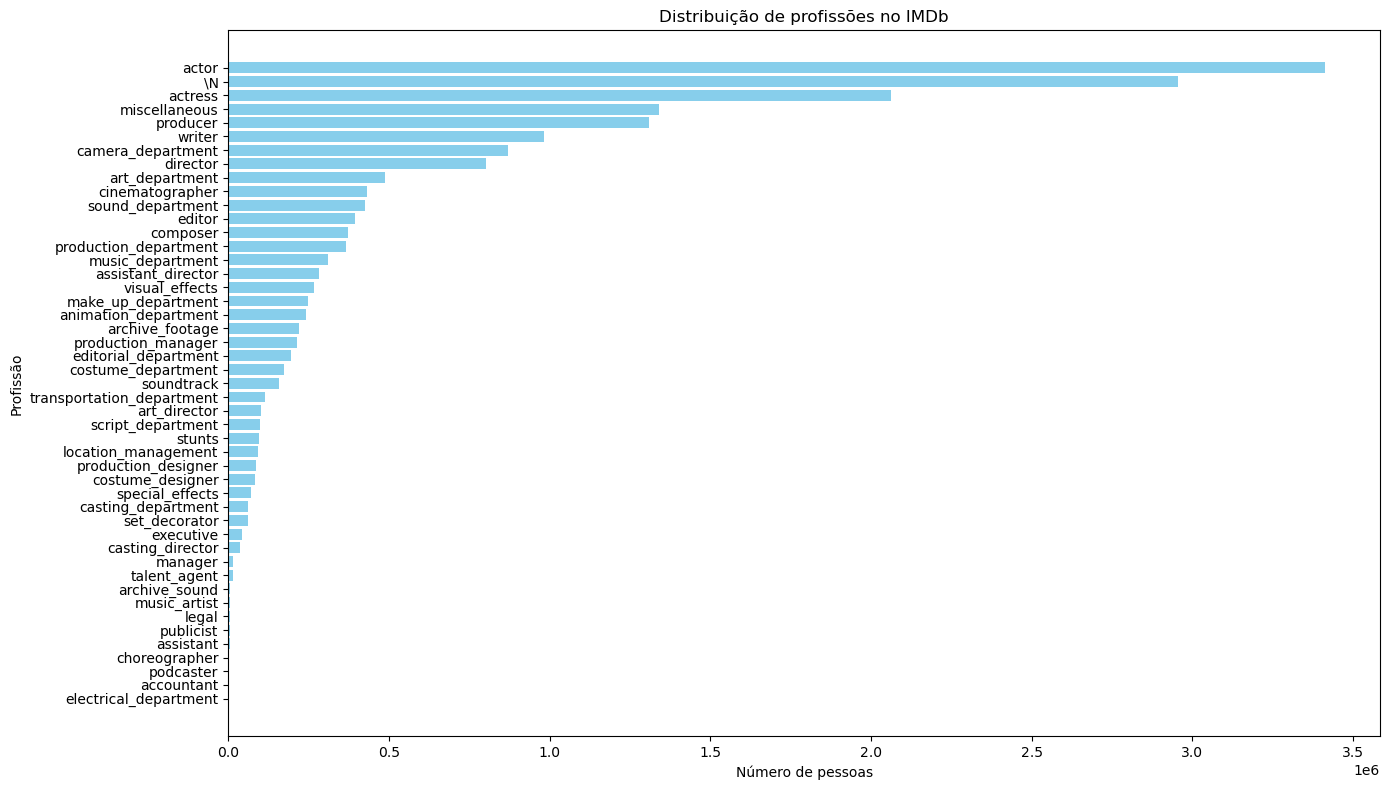

In [12]:
import matplotlib.pyplot as plt

# obter dados da query
df_prof = con.sql("""
SELECT
    profession,
    COUNT(*) AS total
FROM (
    SELECT unnest(string_split(primaryProfession, ',')) AS profession
    FROM imdb_name_basics
)
GROUP BY profession
ORDER BY total DESC
""").df()

# gráfico
plt.figure(figsize=(14, 8))
plt.barh(df_prof["profession"], df_prof["total"], color="skyblue")
plt.xlabel("Número de pessoas")
plt.ylabel("Profissão")
plt.title("Distribuição de profissões no IMDb")
plt.gca().invert_yaxis()  # para mostrar a profissão mais comum no topo
plt.tight_layout()
plt.show()


#### 1.2 Ficheiro "title.akas.tsv"

In [13]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_title_akas AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.akas.tsv"}', delim='\t', header=TRUE)
""")


In [14]:
con.sql("DESCRIBE imdb_title_akas").df()

,column_name,column_type,null,key,default,extra
0,titleId,VARCHAR,YES,None,None,None
1,ordering,BIGINT,YES,None,None,None
2,title,VARCHAR,YES,None,None,None
3,region,VARCHAR,YES,None,None,None
4,language,VARCHAR,YES,None,None,None
5,types,VARCHAR,YES,None,None,None
6,attributes,VARCHAR,YES,None,None,None
7,isOriginalTitle,BIGINT,YES,None,None,None


In [15]:
con.sql("SELECT * FROM imdb_title_akas LIMIT 10").df()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
5,tt0000001,6,Карменсита,RU,\N,imdbDisplay,\N,0
6,tt0000001,7,Карменсіта,UA,\N,imdbDisplay,\N,0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0


In [16]:
#quantos filmes tem esta database?
con.sql("""
SELECT COUNT(DISTINCT titleId) AS total_titulos
FROM imdb_title_akas
""").df()
#12 milhões 44 mil e 167 titulos nesta tabela.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,total_titulos
0,12044167


In [17]:
#quantos filmes tem esta database?
con.sql("""
SELECT COUNT(titleId) AS total_titulos
FROM imdb_title_akas
""").df()
#Esta tabea tem 53 milhões e 893 mil e 147 titulos nesta tabela.

,total_titulos
0,53893147


#### 1.3 Ficheiro "title.basics.tsv"

In [18]:
con.sql(f"""
CREATE OR REPLACE view imdb_title_basics AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.basics.tsv"}', delim='\t', header=TRUE)
""")


In [19]:
con.sql("describe imdb_title_basics").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,titleType,VARCHAR,YES,None,None,None
2,primaryTitle,VARCHAR,YES,None,None,None
3,originalTitle,VARCHAR,YES,None,None,None
4,isAdult,BIGINT,YES,None,None,None
5,startYear,VARCHAR,YES,None,None,None
6,endYear,VARCHAR,YES,None,None,None
7,runtimeMinutes,VARCHAR,YES,None,None,None
8,genres,VARCHAR,YES,None,None,None


In [20]:
con.sql("SELECT * FROM imdb_title_basics LIMIT 10").df()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [21]:
#quantos filmes tem esta database?
con.sql("""
SELECT COUNT(DISTINCT tconst) AS total_titulos
FROM imdb_title_basics
""").df()
#12 milhões 46 mil e 631.


,total_titulos
0,12046631


In [22]:
#quantos filmes tem esta database?
con.sql("""
SELECT COUNT(DISTINCT titleType) AS total_titulos
FROM imdb_title_basics
""").df()
#12 milhões 46 mil e 631.

,total_titulos
0,11


In [23]:
#quantos filmes tem esta database?
con.sql("""
SELECT DISTINCT titleType AS total_titulos
FROM imdb_title_basics
""").df()
#12 milhões 46 mil e 631.

,total_titulos
0,tvShort
1,video
2,short
3,videoGame
4,tvEpisode
5,tvMiniSeries
6,tvPilot
7,movie
8,tvSpecial
9,tvMovie


#### 1.4 Ficheiro "title.crew.tsv"

In [24]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_title_crew AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.crew.tsv"}', delim='\t', header=TRUE)
""")

In [25]:
con.sql("DESCRIBE imdb_title_crew").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,directors,VARCHAR,YES,None,None,None
2,writers,VARCHAR,YES,None,None,None


In [26]:
con.sql("SELECT * FROM imdb_title_crew LIMIT 10").df()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0005690,nm0374658",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


In [27]:
#quantos directors distintos tem esta database?
con.sql("""
SELECT COUNT(DISTINCT tconst) AS numero_de_titulos,COUNT(DISTINCT directors) AS numero_de_directores, COUNT(DISTINCT writers) AS numero_de_writers
FROM imdb_title_crew
""").df()
#12 milhões 46 mil e 631.

,numero_de_titulos,numero_de_directores,numero_de_writers
0,12048919,983105,1461633


#### 1.5 Ficheiro "title.episode.tsv"

In [28]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_title_episode AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.episode.tsv"}', delim='\t', header=TRUE)
""")

In [29]:
con.sql("DESCRIBE imdb_title_episode").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,parentTconst,VARCHAR,YES,None,None,None
2,seasonNumber,VARCHAR,YES,None,None,None
3,episodeNumber,VARCHAR,YES,None,None,None


In [30]:
con.sql("SELECT * FROM imdb_title_episode LIMIT 10").df()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,\N,\N
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
3,tt0042889,tt0989125,\N,\N
4,tt0043426,tt0040051,3,42
5,tt0043631,tt0989125,2,16
6,tt0043693,tt0989125,2,8
7,tt0043710,tt0989125,3,3
8,tt0044093,tt0959862,1,6
9,tt0044668,tt0044243,2,16


#### 1.6 Ficheiro "title.principals.tsv"

In [31]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_principals AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.principals.tsv"}', delim='\t', header=TRUE)
""")

In [32]:
con.sql("DESCRIBE imdb_principals").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,ordering,BIGINT,YES,None,None,None
2,nconst,VARCHAR,YES,None,None,None
3,category,VARCHAR,YES,None,None,None
4,job,VARCHAR,YES,None,None,None
5,characters,VARCHAR,YES,None,None,None


In [33]:
con.sql("SELECT * FROM imdb_principals LIMIT 500").df()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
...,...,...,...,...,...,...
495,tt0000226,1,nm0378408,producer,producer,\N
496,tt0000227,1,nm4427898,director,\N,\N
497,tt0000227,2,nm0666972,producer,producer,\N
498,tt0000228,1,nm0349785,director,\N,\N


In [34]:
con.sql("""
SELECT category, COUNT(*) AS total
FROM imdb_principals
GROUP BY category
ORDER BY total DESC
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,total
0,actor,22719012
1,actress,17158284
2,self,14124424
3,writer,11435609
4,director,8212472
5,producer,7156896
6,editor,5053629
7,cinematographer,3863550
8,composer,3096612
9,production_designer,1141840


In [35]:
con.sql("""
SELECT job, COUNT(*) AS total
FROM imdb_principals
GROUP BY job
ORDER BY total DESC
""").df()



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,job,total
0,\N,77742195
1,producer,6982719
2,writer,1769000
3,director,874812
4,written by,750320
...,...,...
45677,"play ""The Marionettes""",1
45678,"story ""The Adventure of the Bruce-Partington P...",1
45679,"novel ""Trust D.E. oder Die Zerstörung Eurpas""",1
45680,are based upon stories from the collected stor...,1


#### 1.7 Ficheiro "title.ratings.tsv"

In [36]:
con.sql(f"""
CREATE OR REPLACE VIEW imdb_ratings AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.ratings.tsv"}', delim='\t', header=TRUE)
""")

In [37]:
con.sql("DESCRIBE imdb_ratings").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,averageRating,DOUBLE,YES,None,None,None
2,numVotes,BIGINT,YES,None,None,None


In [38]:
con.sql("SELECT * FROM imdb_ratings LIMIT 10").df()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2183
1,tt0000002,5.5,304
2,tt0000003,6.4,2263
3,tt0000004,5.2,195
4,tt0000005,6.2,3006
5,tt0000006,5.0,220
6,tt0000007,5.3,932
7,tt0000008,5.3,2355
8,tt0000009,5.3,231
9,tt0000010,6.8,8137


In [39]:
con.sql("""
SELECT
    COUNT(*)                        AS total_filmes,
    MIN(averageRating)              AS min_rating,
    MAX(averageRating)              AS max_rating,
    AVG(averageRating)              AS media_rating,
    MIN(numVotes)                   AS min_votes,
    MAX(numVotes)                   AS max_votes,
    AVG(numVotes)                   AS media_votes
FROM imdb_ratings
""").df()


,total_filmes,min_rating,max_rating,media_rating,min_votes,max_votes,media_votes
0,1634484,1.0,10.0,6.928612,5,3116740,1017.511738


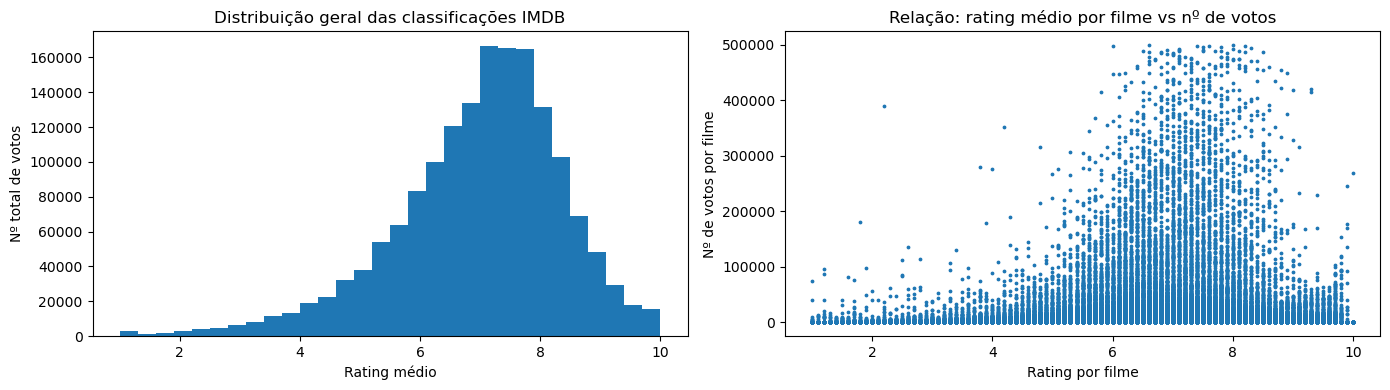

In [40]:
# carregar dados
df_ratings = con.sql("SELECT averageRating FROM imdb_ratings").df()
df_votes   = con.sql("SELECT numVotes, averageRating FROM imdb_ratings WHERE numVotes < 500000").df()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,4))

# --- gráfico 1: hist rating
axes[0].hist(df_ratings["averageRating"], bins=30)
axes[0].set_title("Distribuição geral das classificações IMDB")
axes[0].set_xlabel("Rating médio")
axes[0].set_ylabel("Nº total de votos")

# --- gráfico 2: scatter com eixos trocados
axes[1].scatter(df_votes["averageRating"], df_votes["numVotes"], s=3)
axes[1].set_title("Relação: rating médio por filme vs nº de votos")
axes[1].set_xlabel("Rating por filme")
axes[1].set_ylabel("Nº de votos por filme")

plt.tight_layout()
plt.show()


#### 1.8 resumo
Tabelas do dataset Adicional:

  - imdb_name_basics(Descrição de todos os nomes registados através do nconst):
    - nconst (manter)
    - primaryName  (manter)
    - birthYear
    - deathYear  
    - primaryProfession
    - knownforTitles (manter)

 - imdb_title_akas (a remover):
   - titleid
   - ordering
   - title
   - region
   - language
   - types
   - attributes
   - isOriginalTitle

 - imdb_title_basics(manter apenas os "Movies"):
   - tconst (manter apenas a classe movies)
   - titleType
   - primaryTitle
   - originalTitle
   - isAdult
   - startYear (manter apenas a classe movies)
   - endYear
   - runtimeMinutes
   - genres (manter apenas a classe movies)

 - imdb_title_crew(a manter):
   - tconst
   - directors
   - writers

 - imdb_title_episode(a remover);
    - tconst
    - parentTconst
    - seasonNumber
    - episodeNumber

 - imdb_principals(a manter)
    - tconst
    - ordering
    - nconst
    - category
    - job
    - characters

In [41]:
# mostrar estado final
con.sql("""
SELECT table_name, table_type
FROM information_schema.tables
""").df()

,table_name,table_type
0,links,BASE TABLE
1,movielens_actors,BASE TABLE
2,movielens_directors,BASE TABLE
3,movielens_directors_people,BASE TABLE
4,movielens_ratings_imdb,BASE TABLE
5,movielens_writers,BASE TABLE
6,movies,BASE TABLE
7,ratings,BASE TABLE
8,tags,BASE TABLE
9,imdb_map_ids,VIEW


In [42]:
#passo 1 → quantos filmes MovieLens têm imdbId?

con.sql("""
SELECT COUNT(*) AS total_movielens,
       COUNT(imdbId) AS total_com_imdbid,
       COUNT(*) - COUNT(imdbId) AS sem_imdbid
FROM links
""").df()


,total_movielens,total_com_imdbid,sem_imdbid
0,9742,9742,0


In [43]:
#Normalizar links → criar tconst (usa uma vez)

con.sql("""
CREATE OR REPLACE VIEW links_norm AS
SELECT
  movieId,
  'tt' || lpad(CAST(imdbId AS VARCHAR), 7, '0') AS tconst,
  tmdbId
FROM links
""")


In [44]:
con.sql("SELECT * FROM imdb_map_ids LIMIT 10").df()

,movieId,tconst
0,1,tt0114709
1,2,tt0113497
2,3,tt0113228
3,4,tt0114885
4,5,tt0113041
5,6,tt0113277
6,7,tt0114319
7,8,tt0112302
8,9,tt0114576
9,10,tt0113189


In [45]:
#Função de verificação ad-hoc + exemplo para

def check_movie(movie_id: int):
    return con.sql(f"""
        WITH base AS (
          SELECT
            m.movieId,
            m.title                       AS movielens_title,
            ln.tconst                     AS imdb_tconst,
            b.primaryTitle                AS imdb_title,
            b.startYear                   AS imdb_year,
            regexp_extract(m.title, '(\\d{{4}})\\)$', 1)::INT AS ml_year,
            lower(trim(regexp_replace(m.title, '\\s*\\(\\d{{4}}\\)\\s*$', ''))) AS ml_title_clean
          FROM movies m
          LEFT JOIN links_norm ln USING (movieId)
          LEFT JOIN imdb_title_basics b ON b.tconst = ln.tconst
          WHERE m.movieId = {movie_id}
        )
        SELECT
          movieId,
          movielens_title,
          imdb_tconst,
          'https://www.imdb.com/title/' || imdb_tconst || '/' AS imdb_url,
          imdb_title,
          imdb_year,
          ml_year,
          (imdb_title IS NOT NULL AND ml_title_clean = lower(trim(imdb_title))) AS same_title,
          (imdb_year  IS NOT NULL AND ml_year IS NOT NULL AND imdb_year = ml_year) AS same_year
        FROM base
    """).df()

# Exemplo: verificar o movieId = 1
check_movie(100)


,movieId,movielens_title,imdb_tconst,imdb_url,imdb_title,imdb_year,ml_year,same_title,same_year
0,100,City Hall (1996),tt0115907,https://www.imdb.com/title/tt0115907/,City Hall,1996,1996,True,True


### 2.0 Ligação MovieLens Imdb
#### 2.1 Criação de tabela de Mapeamento do Id dos filmes entre datasets

In [46]:
# imdb id mapping (MovieLens -> IMDB tconst)
con.sql("""
CREATE OR REPLACE VIEW imdb_map_ids AS
SELECT
    movieId,
    'tt' || LPAD(imdbId, 7, '0') AS tconst
FROM links
WHERE imdbId IS NOT NULL;
""")

In [47]:
con.sql("SELECT * FROM imdb_map_ids LIMIT 10").df()

,movieId,tconst
0,1,tt0114709
1,2,tt0113497
2,3,tt0113228
3,4,tt0114885
4,5,tt0113041
5,6,tt0113277
6,7,tt0114319
7,8,tt0112302
8,9,tt0114576
9,10,tt0113189


#### 2.2 Criação de tabela movielens_directors com directores dos filmes

In [48]:
#Criação do código para criar a tabela movielens_directors
con.sql("""
CREATE OR REPLACE TABLE movielens_directors AS
WITH base AS (
    SELECT
        m.movieId,
        m.title,
        map.tconst,
        c.directors                        -- comma-separated nconst list
    FROM movies m
    JOIN imdb_map_ids map ON map.movieId = m.movieId
    JOIN imdb_title_crew c ON c.tconst = map.tconst
),
exploded AS (
    SELECT
        b.movieId,
        b.title,
        b.tconst,
        TRIM(nc.nconst) AS director_nconst
    FROM base b
    -- explode comma-separated directors into rows
    CROSS JOIN UNNEST(str_split(b.directors, ',')) AS nc(nconst)
    WHERE b.directors IS NOT NULL AND b.directors <> ''
)
SELECT
    e.movieId,
    e.title,
    e.tconst,
    e.director_nconst,
    nb.primaryName AS director_name
FROM exploded e
LEFT JOIN imdb_name_basics nb ON nb.nconst = e.director_nconst;
""")


In [49]:
#Query para determinar quantos fimes do nosso dataset original encontram aqui resposta para o seu director e quantos não encontrma
con.sql("""
WITH t AS (
    SELECT COUNT(*) AS total_movies FROM movies
),
d AS (
    SELECT COUNT(DISTINCT movieId) AS movies_with_director
    FROM movielens_directors_people
)
SELECT
    t.total_movies,
    d.movies_with_director,
    t.total_movies - d.movies_with_director AS movies_without_director
FROM t, d;
""").df()

,total_movies,movies_with_director,movies_without_director
0,9742,9719,23


In [50]:
#Média, moda e mediana do nº de realizadores por filme
con.sql("""
WITH per_film AS (
  SELECT movieId, COUNT(DISTINCT director_nconst) AS num_directors
  FROM movielens_directors
  GROUP BY movieId
),
mode_calc AS (
  SELECT num_directors
  FROM per_film
  GROUP BY num_directors
  ORDER BY COUNT(*) DESC, num_directors
  LIMIT 1
)
SELECT
  AVG(num_directors)       AS mean_directors,
  median(num_directors)    AS median_directors,
  (SELECT num_directors FROM mode_calc) AS mode_directors
FROM per_film;
""").df()

,mean_directors,median_directors,mode_directors
0,1.134993,1.0,1


In [51]:
#identicação do nº de directores por filme
con.sql("""
WITH per_film AS (
  SELECT movieId, COUNT(DISTINCT director_nconst) AS num_directors
  FROM movielens_directors
  GROUP BY movieId
)
SELECT num_directors, COUNT(*) AS n_films
FROM per_film
GROUP BY num_directors
ORDER BY num_directors;
""").df()

,num_directors,n_films
0,1,8909
1,2,632
2,3,101
3,4,21
4,5,17
5,6,9
6,7,7
7,8,6
8,9,3
9,10,4


In [52]:
#identicação do nome dos filmes com maior numero de directores por filme
con.sql("""
SELECT
    movieId,
    title,
    COUNT(*) AS num_directors
FROM movielens_directors
GROUP BY movieId, title
HAVING COUNT(*) > 1
ORDER BY num_directors DESC, title;
""").df()


,movieId,title,num_directors
0,100397,"ABCs of Death, The (2012)",27
1,40697,Babylon 5,25
2,171749,Death Note: Desu nôto (2006–2007),21
3,50912,"Paris, I Love You (Paris, je t'aime) (2006)",21
4,68945,Neon Genesis Evangelion: Death & Rebirth (Shin...,15
...,...,...,...
805,163386,Winnie the Pooh and the Day of Concern (1972),2
806,96567,"Words, The (2012)",2
807,45726,"You, Me and Dupree (2006)",2
808,57274,[REC] (2007),2


#### 2.3 Criação de tabela movielens_writers com os writers dos filmes

In [53]:
# One row per writer, with real name
con.sql("""
CREATE OR REPLACE TABLE movielens_writers AS
WITH base AS (
    SELECT
        m.movieId,
        m.title,
        map.tconst,
        c.writers                        -- comma-separated nconst list
    FROM movies m
    JOIN imdb_map_ids map ON map.movieId = m.movieId
    JOIN imdb_title_crew c ON c.tconst = map.tconst
),
exploded AS (
    SELECT
        b.movieId,
        b.title,
        b.tconst,
        TRIM(nc.nconst) AS writer_nconst
    FROM base b
    CROSS JOIN UNNEST(str_split(b.writers, ',')) AS nc(nconst)
    WHERE b.writers IS NOT NULL AND b.writers <> ''
)
SELECT
    e.movieId,
    e.title,
    e.tconst,
    e.writer_nconst,
    nb.primaryName AS writer_name
FROM exploded e
LEFT JOIN imdb_name_basics nb ON nb.nconst = e.writer_nconst;
""")


In [54]:
# Coverage: how many ML movies have at least one writer mapped vs not
con.sql("""
WITH t AS (
    SELECT COUNT(*) AS total_movies FROM movies
),
w AS (
    SELECT COUNT(DISTINCT movieId) AS movies_with_writer
    FROM movielens_writers
)
SELECT
    t.total_movies,
    w.movies_with_writer,
    t.total_movies - w.movies_with_writer AS movies_without_writer
FROM t, w;
""").df()

,total_movies,movies_with_writer,movies_without_writer
0,9742,9719,23


In [55]:
# Mean, median, and mode for number of writers per film
con.sql("""
WITH per_film AS (
  SELECT movieId, COUNT(DISTINCT writer_nconst) AS num_writers
  FROM movielens_writers
  GROUP BY movieId
),
mode_calc AS (
  SELECT num_writers
  FROM per_film
  GROUP BY num_writers
  ORDER BY COUNT(*) DESC, num_writers
  LIMIT 1
)
SELECT
  AVG(num_writers)                 AS mean_writers,
  median(num_writers)              AS median_writers,
  (SELECT num_writers FROM mode_calc) AS mode_writers
FROM per_film;
""").df()


,mean_writers,median_writers,mode_writers
0,2.494187,2.0,2


In [56]:
# Histogram: number of writers -> number of films
con.sql("""
WITH per_film AS (
  SELECT movieId, COUNT(DISTINCT writer_nconst) AS num_writers
  FROM movielens_writers
  GROUP BY movieId
)
SELECT num_writers, COUNT(*) AS n_films
FROM per_film
GROUP BY num_writers
ORDER BY num_writers;
""").df()


,num_writers,n_films
0,1,3046
1,2,3093
2,3,1830
3,4,858
4,5,430
5,6,195
6,7,87
7,8,46
8,9,33
9,10,25


In [57]:
# Films with more than one writer (list names if you want)
con.sql("""
SELECT
    movieId,
    title,
    COUNT(DISTINCT writer_nconst) AS num_writers
FROM movielens_writers
GROUP BY movieId, title
HAVING COUNT(DISTINCT writer_nconst) > 1
ORDER BY num_writers DESC, title;
""").df()


,movieId,title,num_writers
0,1907,Mulan (1998),32
1,364,"Lion King, The (1994)",29
2,50912,"Paris, I Love You (Paris, je t'aime) (2006)",29
3,6889,Brother Bear (2003),27
4,132888,Comedy Central Roast of James Franco (2013),27
...,...,...,...
6668,2698,Zone 39 (1997),2
6669,60885,"Zone, The (La Zona) (2007)",2
6670,156553,Zoom (2015),2
6671,5899,Zulu (1964),2


This table does not make sense. After visiting IMDB page is undertanded that there are several diferent writers but only one general wrting. 

link: https://www.imdb.com/title/tt0120762/fullcredits/?ref_=tt_ov_sm_2#amzn1.imdb.concept.name_credit_category.c84ecaff-add5-4f2e-81db-102a41881fe3
 

#### 2.4 Criação de tabela movielens_writers com os actors dos filmes

In [58]:
#criação da tabela movielens_actors
con.sql("""
CREATE OR REPLACE TABLE movielens_actors AS
SELECT
    m.movieId,
    m.title,
    map.tconst,
    p.nconst           AS actor_nconst,
    nb.primaryName     AS actor_name,
    p.category,
    p.characters
FROM movies m
JOIN imdb_map_ids map ON map.movieId = m.movieId
JOIN imdb_principals p ON p.tconst = map.tconst
LEFT JOIN imdb_name_basics nb ON nb.nconst = p.nconst
WHERE p.category IN ('actor', 'actress');
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [59]:
#remoção dos caracteres que nao queremos [" e "]:
con.sql("""
UPDATE movielens_actors
SET characters = REGEXP_REPLACE(characters, '[\\[\\]\"]', '', 'g')
""")


In [60]:
#Preview da tabela
con.sql("SELECT * FROM movielens_actors LIMIT 500").df()

,movieId,title,tconst,actor_nconst,actor_name,category,characters
0,3379,On the Beach (1959),tt0053137,nm0000060,Gregory Peck,actor,Cmdr. Dwight Lionel Towers
1,3379,On the Beach (1959),tt0053137,nm0001257,Ava Gardner,actress,Moira Davidson
2,3379,On the Beach (1959),tt0053137,nm0000001,Fred Astaire,actor,Julian Osborn
3,3379,On the Beach (1959),tt0053137,nm0000578,Anthony Perkins,actor,Lt. Peter Holmes
4,3379,On the Beach (1959),tt0053137,nm0025997,Donna Anderson,actress,Mary Holmes
...,...,...,...,...,...,...,...
495,2550,"Haunting, The (1963)",tt0057129,nm0001954,Claire Bloom,actress,Theodora
496,2550,"Haunting, The (1963)",tt0057129,nm0426062,Richard Johnson,actor,Dr. John Markway
497,2550,"Haunting, The (1963)",tt0057129,nm0848560,Russ Tamblyn,actor,Luke Sannerson
498,2550,"Haunting, The (1963)",tt0057129,nm0174029,Fay Compton,actress,Mrs. Sannerson


In [61]:
#Top 20 most common character names
con.sql("""
SELECT
    characters,
    COUNT(*) AS n_rows
FROM movielens_actors
GROUP BY characters
ORDER BY n_rows DESC
LIMIT 20;
""").df()


,characters,n_rows
0,\N,500
1,Narrator,211
2,Jack,115
3,Sam,113
4,Frank,112
5,Paul,101
6,John,92
7,Max,85
8,Sarah,85
9,Charlie,84


In [62]:
#Actors who played more than one character in the same movie
con.sql("""
WITH per_actor AS (
    SELECT
        movieId,
        actor_nconst,
        actor_name,
        COUNT(DISTINCT characters) AS num_characters
    FROM movielens_actors
    WHERE characters IS NOT NULL AND characters <> ''
    GROUP BY movieId, actor_nconst, actor_name
)
SELECT *
FROM per_actor
WHERE num_characters > 1
ORDER BY num_characters DESC, actor_name;
""").df()


,movieId,actor_nconst,actor_name,num_characters
0,95004,nm0000284,Adam Baldwin,3
1,5879,nm0001191,Adam Sandler,3
2,139640,nm2300801,Aileen Mythen,3
3,48045,nm0149260,Alain Chabat,3
4,6639,nm0000273,Alan Arkin,3
...,...,...,...,...
2416,31610,nm0955471,Ziyi Zhang,2
2417,113394,nm1443740,Zoe Kazan,2
2418,90809,nm1549582,Zoé Héran,2
2419,126142,nm0596807,Ángela Molina,2


In [63]:
#Actors who played Batman (any variation, case insensitive)
con.sql("""
SELECT DISTINCT movieId, title, actor_name, characters
FROM movielens_actors
WHERE characters ILIKE '%batman%'
ORDER BY title, actor_name;
""").df()


,movieId,title,actor_name,characters
0,6620,American Splendor (2003),Joey Krajcar,Batman
1,1562,Batman & Robin (1997),George Clooney,Batman
2,26152,Batman (1966),Adam West,Batman
3,592,Batman (1989),Michael Keaton,Batman
4,33794,Batman Begins (2005),Christian Bale,Batman
5,27311,Batman Beyond: Return of the Joker (2000),Will Friedle,Batman
6,153,Batman Forever (1995),Val Kilmer,Batman
7,1377,Batman Returns (1992),Michael Keaton,Batman
8,136864,Batman v Superman: Dawn of Justice (2016),Ben Affleck,Batman
9,131739,Batman vs. Robin (2015),Jason O'Mara,Batman


In [64]:
# Top actors who played Batman (by number of distinct films)
con.sql("""
SELECT
  actor_name,
  COUNT(DISTINCT movieId) AS films_as_batman
FROM movielens_actors
WHERE characters ILIKE '%Batman%'
GROUP BY actor_nconst, actor_name
ORDER BY films_as_batman DESC, actor_name;
""").df()


,actor_name,films_as_batman
0,Kevin Conroy,8
1,Ben Affleck,2
2,Michael Keaton,2
3,Peter Weller,2
4,Will Arnett,2
5,Adam West,1
6,Ben McKenzie,1
7,Bruce Greenwood,1
8,Christian Bale,1
9,George Clooney,1


#### 2.5 Criação de tabela com avaliação os ratings e votos do imdb

In [65]:
# IMDb ratings mapped to MovieLens movieId
con.sql("""
CREATE OR REPLACE TABLE movielens_ratings_imdb AS
SELECT
    m.movieId,
    map.tconst,
    r.numVotes,
    r.averageRating
FROM movies m
JOIN imdb_map_ids map ON map.movieId = m.movieId
LEFT JOIN imdb_ratings r ON r.tconst = map.tconst
""")


In [66]:
con.sql("""
SELECT
    COUNT(*) AS total,
    COUNT(averageRating) AS with_rating,
    COUNT(*) - COUNT(averageRating) AS without_rating
FROM movielens_ratings_imdb
""").df()


,total,with_rating,without_rating
0,9742,9719,23


In [67]:
# Sample top by votes
con.sql("""
SELECT *
FROM movielens_ratings_imdb
WHERE numVotes IS NOT NULL
ORDER BY numVotes DESC
LIMIT 10
""").df()


,movieId,tconst,numVotes,averageRating
0,318,tt0111161,3116740,9.3
1,58559,tt0468569,3092751,9.1
2,79132,tt1375666,2747491,8.8
3,2959,tt0137523,2531591,8.8
4,356,tt0109830,2434223,8.8
5,109487,tt0816692,2426457,8.7
6,296,tt0110912,2381196,8.8
7,2571,tt0133093,2198642,8.7
8,858,tt0068646,2173294,9.2
9,4993,tt0120737,2152498,8.9


#### Fechar a ligação

In [68]:
con.close()
print("Ligação fechada.")

Ligação fechada.
